# Monte Carlo Simulation of Dividend Discount Model

## Description
You are trying to determine the value of a mature company. The company has had stable dividend growth for a long time so you select the dividend discount model (DDM).
$$P = \frac{d_1}{r_s - g}$$

### Level 1
- The next dividend will be \\$1 and your baseline estimates of the cost of capital and growth are 9% and 4%, respectively
- Write a function which is able to get the price based on values of the inputs
- Then you are concerned about mis-estimation of the inputs and how it could affect the price. So then assume that the growth rate has a mean of 4% but a standard deviation of 1%
- Visualize and summarize the resulting probability distribution of the price

### Level 2
Continue from the first exercise:
- Now you are also concerned you have mis-estimated the cost of capital. So now use a mean of 9% and standard deviation of 2%, in addition to varying the growth
- Visualize and summarize the resulting probability distribution of the price
- Be careful as in some cases, the drawn cost of capital will be lower than the drawn growth rate, which breaks the DDM.
    - You will need to modify your logic to throw out these cases.

## Setup

In [1]:
from IPython.display import HTML, display
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random

### Level 1

In [2]:
def price_ddm(dividend, cost_of_capital, growth):
    '''
    Function to determine the price of a company based on the dividend
    discount model, according to the example, inputs are placed by default
    '''
    return dividend / (cost_of_capital - growth)
price_ddm(1, 0.09, 0.04)

20.0

In [3]:
dividend = 1
cost_of_capital = 0.09
growth_mean = 0.04
growth_std = 0.01
n_iter = 1000000
def price_ddm_simulations(dividend, cost_of_capital, growth_mean, growth_std, n_iter):
    outputs = []
    for i in range(n_iter):
        growth_prob = random.normalvariate(growth_mean, growth_std)
        result = price_ddm(dividend, cost_of_capital, growth = growth_prob)
        outputs.append((growth_prob,result))
    return outputs

In [4]:
l1_results = price_ddm_simulations(dividend, cost_of_capital, growth_mean, growth_std, n_iter)
print(f'There are {len(l1_results)} results. First five:')
l1_results[:5]

There are 1000000 results. First five:


[(0.02834173317814204, 16.218425387940005),
 (0.02165312930773638, 14.631247778739825),
 (0.02470899152650781, 15.316044634323497),
 (0.04975692370836847, 24.84899496135061),
 (0.034316912431884936, 17.958774264748467)]

### Visualize the Outputs

Usually a first good way to analyze the outputs is to visualize them. Let's plot the results. A histogram or KDE plot is usually most appropriate for visualizing a single output. The KDE is basically a smoothed out histogram.

<AxesSubplot:ylabel='Frequency'>

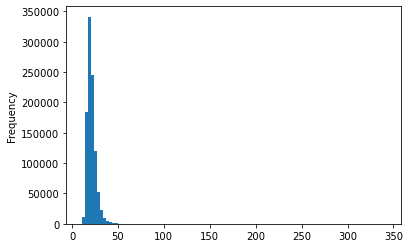

In [5]:
df = pd.DataFrame(l1_results, columns = ['Growth', 'Price'])
df['Price'].plot.hist(bins=100)

<AxesSubplot:ylabel='Density'>

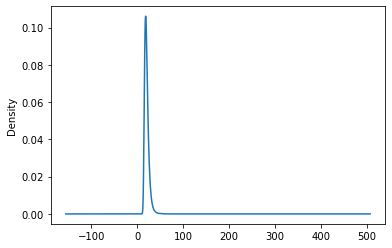

In [6]:
df['Price'].plot.kde()

As we can see, the results look basically like a normal distribution. Which makes sense because we only have one input changing and it is following a normal distribution.

### Probability Table
We would like to see two other kinds of outputs. One is a table of probabilities, along with the result which is achived at that probability in the distribution. E.g. at 5%, only 5% of cases are lower than the given value. At 75%, 75% of cases are lower than the given value. <br><br>
First we'll get the percentiles we want to explore in the table.

In [7]:
percentiles = [i/20 for i in range(1, 20)]
percentiles

[0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

Now we can use the `.quantile` method from `pandas` to get this table easily. <br>
For a better look of the dataframe we can create a function which will style the DF

In [8]:
def styled_df(df):
    return df.style.format({
        'Growth' : '{:.2%}',
        'Price' : '${:,.2f}'
    })
styled_df(df.quantile(percentiles))

,Growth,Price
0.05,2.36%,$15.05
0.1,2.72%,$15.92
0.15,2.97%,$16.57
0.2,3.16%,$17.12
0.25,3.33%,$17.63
0.3,3.48%,$18.10
0.35,3.62%,$18.57
0.4,3.75%,$19.05
0.45,3.88%,$19.52
0.5,4.00%,$20.01


### Level 2

In [9]:
# We will now modify the previous function to include variation in the cost of capital
dividend = 1
cost_capital_mean = 0.09
cost_capital_std = 0.02
growth_mean = 0.04
growth_std = 0.01
n_iter = 1000000
def price_ddm_simulations(dividend, cost_capital_mean, cost_capital_std, growth_mean, growth_std, n_iter):
    outputs = []
    for i in range(n_iter):
        growth_prob = random.normalvariate(growth_mean, growth_std)
        rate_prob = random.normalvariate(cost_capital_mean, cost_capital_std)
        result = price_ddm(dividend, cost_of_capital=rate_prob, growth = growth_prob)
        outputs.append((growth_prob, rate_prob, result))
    return outputs

In [10]:
l2_results = price_ddm_simulations(dividend, cost_capital_mean, cost_capital_std, growth_mean, growth_std, n_iter)
df_2 = pd.DataFrame(l2_results, columns = ['Growth', 'Cost of Capital', 'Price'])
def styled_df(df):
    return df.style.format({
        'Growth' : '{:.2%}',
        'Price' : '${:,.2f}',
        'Cost of Capital' : '{:.2%}'
    })
styled_df(df_2.quantile(percentiles))

,Growth,Cost of Capital,Price
0.05,2.35%,5.71%,$11.13
0.1,2.72%,6.44%,$12.44
0.15,2.96%,6.93%,$13.44
0.2,3.16%,7.32%,$14.32
0.25,3.32%,7.65%,$15.17
0.3,3.48%,7.95%,$16.00
0.35,3.61%,8.23%,$16.85
0.4,3.75%,8.49%,$17.74
0.45,3.87%,8.75%,$18.69
0.5,4.00%,9.00%,$19.72


<AxesSubplot:ylabel='Frequency'>

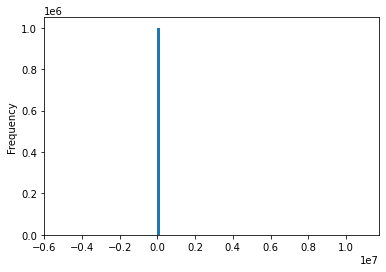

In [11]:
df_2['Price'].plot.hist(bins=100)

We notice that some price values are negative when adding variation to the cost of capital, this is due to growth rate being greater than the cost of capital which will "break" the DDM model and show negative prices. <br><br>
We can look where did that happen in the next line of code:

In [12]:
df_2[df_2['Growth'] > df_2['Cost of Capital']]

,Growth,Cost of Capital,Price
1,0.039711,0.033672,-165.574530
26,0.036851,0.023396,-74.323878
36,0.056732,0.056403,-3042.026987
69,0.051813,0.048511,-302.837416
94,0.049036,0.047126,-523.677982
...,...,...,...
999220,0.054318,0.051441,-347.556623
999357,0.037288,0.033522,-265.536667
999413,0.059273,0.047240,-83.108375
999492,0.052495,0.050413,-480.328603


In [13]:
# We will now modify the previous function to get positive values
def price_ddm_simulations(dividend, cost_capital_mean, cost_capital_std, growth_mean, growth_std, n_iter):
    outputs = []
    for i in range(n_iter):
        growth_prob = random.normalvariate(growth_mean, growth_std)
        rate_prob = random.normalvariate(cost_capital_mean, cost_capital_std)
        if growth_prob > rate_prob:
            continue
        result = price_ddm(dividend, cost_of_capital=rate_prob, growth = growth_prob)
        outputs.append((growth_prob, rate_prob, result))
    return outputs

In [14]:
new_l2_results = price_ddm_simulations(dividend, cost_capital_mean, cost_capital_std, growth_mean, growth_std, n_iter)
df_3 = pd.DataFrame(new_l2_results, columns = ['Growth', 'Cost of Capital', 'Price'])
styled_df(df_3.quantile(percentiles))

,Growth,Cost of Capital,Price
0.05,2.35%,5.91%,$11.49
0.1,2.71%,6.56%,$12.68
0.15,2.96%,7.02%,$13.63
0.2,3.15%,7.39%,$14.48
0.25,3.32%,7.71%,$15.30
0.3,3.47%,8.01%,$16.12
0.35,3.60%,8.28%,$16.97
0.4,3.74%,8.53%,$17.86
0.45,3.86%,8.78%,$18.81
0.5,3.99%,9.03%,$19.85


We notice now there is no instance where growth is greater than the cost of capital.

In [15]:
df_3[df_3['Growth'] > df_3['Cost of Capital']]

,Growth,Cost of Capital,Price


<AxesSubplot:ylabel='Frequency'>

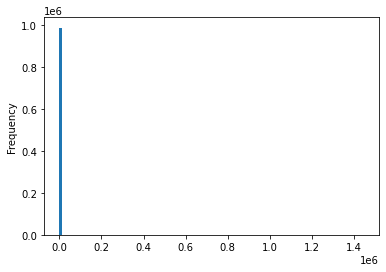

In [16]:
df_3['Price'].plot.hist(bins=100)

There are no longer negative values, however the price range is still looking odd. While growth rate is no longer greater than cost of capital, we can get really close values, which translates to the previous histogram. <br><br>
To make the model better, we will ignore if the growth rate and the cost of capital are quite similar (0.5%)

In [17]:
# We will now modify the previous function to get positive values
def price_ddm_simulations(dividend, cost_capital_mean, cost_capital_std, growth_mean, growth_std, n_iter):
    outputs = []
    for i in range(n_iter):
        growth_prob = random.normalvariate(growth_mean, growth_std)
        rate_prob = random.normalvariate(cost_capital_mean, cost_capital_std)
        if growth_prob > (rate_prob - 0.005):
            continue
        result = price_ddm(dividend, cost_of_capital=rate_prob, growth = growth_prob)
        outputs.append((growth_prob, rate_prob, result))
    return outputs

,Growth,Cost of Capital,Price
0.05,2.34%,6.02%,$11.50
0.1,2.70%,6.64%,$12.68
0.15,2.95%,7.08%,$13.62
0.2,3.14%,7.44%,$14.47
0.25,3.31%,7.75%,$15.29
0.3,3.46%,8.04%,$16.10
0.35,3.60%,8.30%,$16.94
0.4,3.73%,8.56%,$17.83
0.45,3.85%,8.81%,$18.76
0.5,3.98%,9.05%,$19.78


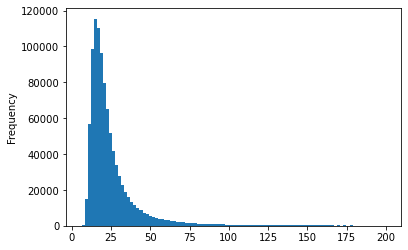

In [18]:
new_l2_results = price_ddm_simulations(dividend, cost_capital_mean, cost_capital_std, growth_mean, growth_std, n_iter)
df_3 = pd.DataFrame(new_l2_results, columns = ['Growth', 'Cost of Capital', 'Price'])
df_3['Price'].plot.hist(bins=100)
styled_df(df_3.quantile(percentiles))

This range of prices make much more sense.